In [1]:
import wikipedia
import wikipediaapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [35]:
## take all article in category (first level)
def print_categorymembers(categorymembers, level=0, max_level=1):
    list_articles = []
    for c in categorymembers.values():
        if c.ns == 0:
            list_articles.append(c) 
            print("%s: %s (ns: %d)" % ("*" * (level + 1), c.title, c.ns))
        elif level < max_level:
            sub_list = []
            sub_list = print_categorymembers(c.categorymembers, level=level + 1, max_level=max_level)
            list_articles = list_articles + sub_list
    return list_articles

In [36]:
wiki_wiki = wikipediaapi.Wikipedia('fr')
cat = wiki_wiki.page("Category:Guerre")

In [37]:
list_articles = print_categorymembers(cat.categorymembers)

*: Guerre (ns: 0)
*: Liste de guerres (ns: 0)
*: Amnésie collective (ns: 0)
*: Armement moderne (ns: 0)
*: Armistice (ns: 0)
*: Arrière (militaire) (ns: 0)
*: Baroud (ns: 0)
*: Bouclier humain (ns: 0)
*: Campagne nationale du Costa Rica (ns: 0)
*: Cessez-le-feu (ns: 0)
*: Chair à canon (ns: 0)
*: Combat (ns: 0)
*: Conflit inter-yéménite de 1972 (ns: 0)
*: Conflit inter-yéménite de 1979 (ns: 0)
*: Conflits frontaliers entre le Pérou et l'Équateur (ns: 0)
*: Conflits préhistoriques (ns: 0)
*: Croix verte (Henri Dunant) (ns: 0)
*: Cycle de la guerre (ns: 0)
*: Déclaration de Genève sur la violence armée et le développement (ns: 0)
*: Déclaration de guerre de la France au roi de Bohême et de Hongrie (ns: 0)
*: Dommages de guerre (ns: 0)
*: Enfant de guerre (ns: 0)
*: Guerre chez les Mayas (ns: 0)
*: Guerre civile du Yémen du Sud (ns: 0)
*: Guerre de 4e génération (ns: 0)
*: Guerre de l'information (ns: 0)
*: Guerre de Quinze Ans (ns: 0)
*: Guerre des castes (ns: 0)
*: Guerre révolutionnair

In [40]:
## Create the adjacency matrix
def make_links(list_articles):
    matrix = np.zeros((len(list_articles), len(list_articles)))
    compt = 0
    for article in list_articles:
        for link in article.links:
            for i in range(len(list_articles)):
                if (link == list_articles[i].title):
                    matrix[compt,i] = 1
    return matrix

In [41]:
adjacency_matrix = make_links(list_articles)

In [42]:
num_edges = np.count_nonzero(adjacency_matrix)
print(f"Number of edges in the feature graph: {num_edges}")

Number of edges in the feature graph: 555


In [43]:
graph = nx.from_numpy_matrix(adjacency_matrix)

In [44]:
pr = nx.pagerank(graph)

/Users/lucaseckes/miniconda2/envs/ntds_2019/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


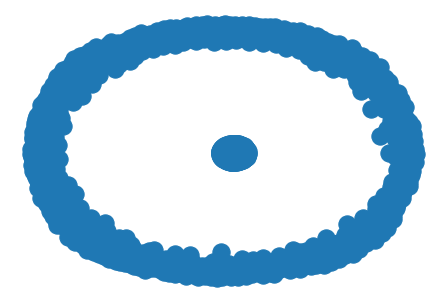

In [45]:
nx.draw(graph)

In [50]:
pr

{0: 0.3831751426661238,
 1: 0.00022497187851669128,
 2: 0.00022497187851669128,
 3: 0.00022497187851669128,
 4: 0.00081086788418579,
 5: 0.00081086788418579,
 6: 0.00022497187851669128,
 7: 0.00081086788418579,
 8: 0.00081086788418579,
 9: 0.00081086788418579,
 10: 0.00022497187851669128,
 11: 0.00081086788418579,
 12: 0.00081086788418579,
 13: 0.00081086788418579,
 14: 0.00081086788418579,
 15: 0.00081086788418579,
 16: 0.00022497187851669128,
 17: 0.00022497187851669128,
 18: 0.00022497187851669128,
 19: 0.00022497187851669128,
 20: 0.00081086788418579,
 21: 0.00022497187851669128,
 22: 0.00022497187851669128,
 23: 0.00022497187851669128,
 24: 0.00022497187851669128,
 25: 0.00081086788418579,
 26: 0.00022497187851669128,
 27: 0.00022497187851669128,
 28: 0.00081086788418579,
 29: 0.00081086788418579,
 30: 0.00081086788418579,
 31: 0.00022497187851669128,
 32: 0.00022497187851669128,
 33: 0.00081086788418579,
 34: 0.00022497187851669128,
 35: 0.00022497187851669128,
 36: 0.00022497187

In [53]:
import operator
sorted_pr = sorted(pr.items(), key=operator.itemgetter(1))

In [54]:
sorted_pr

[(1, 0.00022497187851669128),
 (2, 0.00022497187851669128),
 (3, 0.00022497187851669128),
 (6, 0.00022497187851669128),
 (10, 0.00022497187851669128),
 (16, 0.00022497187851669128),
 (17, 0.00022497187851669128),
 (18, 0.00022497187851669128),
 (19, 0.00022497187851669128),
 (21, 0.00022497187851669128),
 (22, 0.00022497187851669128),
 (23, 0.00022497187851669128),
 (24, 0.00022497187851669128),
 (26, 0.00022497187851669128),
 (27, 0.00022497187851669128),
 (31, 0.00022497187851669128),
 (32, 0.00022497187851669128),
 (34, 0.00022497187851669128),
 (35, 0.00022497187851669128),
 (36, 0.00022497187851669128),
 (37, 0.00022497187851669128),
 (40, 0.00022497187851669128),
 (41, 0.00022497187851669128),
 (43, 0.00022497187851669128),
 (44, 0.00022497187851669128),
 (47, 0.00022497187851669128),
 (49, 0.00022497187851669128),
 (50, 0.00022497187851669128),
 (51, 0.00022497187851669128),
 (52, 0.00022497187851669128),
 (53, 0.00022497187851669128),
 (54, 0.00022497187851669128),
 (55, 0.0002

In [51]:
wikipedia.set_lang('fr')
page = wikipedia.page(list_articles[4].title)
print(page.content.split())

['Un', 'armistice', 'est', 'une', 'convention', 'signée', 'par', 'plusieurs', 'gouvernements', 'mettant', 'fin', 'à', 'des', 'hostilités', 'entre', 'armées', 'en', 'temps', 'de', 'guerre.', 'C’est', 'le', 'jour', 'qui', 'marque', 'officiellement', 'la', 'fin', 'd’un', 'conflit', ';', 'il', 'est', 'souvent', 'considéré', 'comme', 'une', 'fête', 'nationale', 'pour', 'les', 'pays', 'sortis', 'vainqueurs', 'd’un', 'conflit', 'armé.', 'C’est', 'une', 'suspension', 'des', 'hostilités', 'après', 'un', 'accord', 'entre', 'les', 'belligérants.', 'Il', 'est', 'différent', 'd’un', 'cessez-le-feu,', 'qui', 'peut', 'être', 'temporaire,', "d'un", 'traité', 'de', 'paix', 'qui', 'est', 'un', 'traité', 'proclamant', 'la', 'fin', "d'une", 'guerre', 'et', 'contenant', 'souvent', 'des', 'contreparties', 'réciproques', 'pour', 'les', 'anciens', 'belligérants,', 'et', "d'une", 'capitulation.', 'Mettant', 'fin', 'officiellement', 'à', 'la', 'guerre,', 'un', 'armistice', 'permet', 'au', 'pays', 'demandeur', '